In [59]:
import plotly
import kaleido

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy import stats
from plotly.subplots import make_subplots
from IPython.display import Image, display

import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('eda_fraud_balanced_sorted.csv')

print(df.shape)
df.head()

(15012, 16)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 07:11:55,377026671291680,fraud_Conroy-Cruickshank,gas_transport,71.06,F,Redford,MO,37.3272,-91.0243,241,Investment analyst,1325401915,36.447073,-91.941927,0
1,2019-01-01 10:10:27,2706977570537524,fraud_Huels-Nolan,gas_transport,70.17,M,Zaleski,OH,39.2830,-82.3977,341,Accounting technician,1325412627,38.340454,-81.412293,0
2,2019-01-01 10:45:15,30044330818990,fraud_DuBuque LLC,grocery_pos,176.63,F,Fort Myers,FL,26.4722,-81.8122,224256,Paramedic,1325414715,26.258936,-81.972659,0
3,2019-01-01 11:26:05,376656886990758,fraud_Berge LLC,gas_transport,68.32,M,Zavalla,TX,31.1569,-94.3871,2836,"Designer, jewellery",1325417165,31.680455,-94.084240,0
4,2019-01-01 12:26:57,30487648872433,fraud_Bednar Inc,travel,5.09,F,Central,IN,38.0970,-86.1723,350,Counsellor,1325420817,37.653705,-86.315351,0


📚 Libraries imported successfully!
✅ Real data loaded!
📈 Dataset loaded: 15,012 transactions
🚨 Fraudulent transactions: 7,506 (50.0%)
✅ Legitimate transactions: 7,506 (50.0%)

📋 Data preview:
  trans_date_trans_time            cc_num                  merchant  \
0   2019-01-01 07:11:55   377026671291680  fraud_Conroy-Cruickshank   
1   2019-01-01 10:10:27  2706977570537524         fraud_Huels-Nolan   
2   2019-01-01 10:45:15    30044330818990         fraud_DuBuque LLC   
3   2019-01-01 11:26:05   376656886990758           fraud_Berge LLC   
4   2019-01-01 12:26:57    30487648872433          fraud_Bednar Inc   

        category     amt gender        city state      lat     long  city_pop  \
0  gas_transport   71.06      F     Redford    MO  37.3272 -91.0243       241   
1  gas_transport   70.17      M     Zaleski    OH  39.2830 -82.3977       341   
2    grocery_pos  176.63      F  Fort Myers    FL  26.4722 -81.8122    224256   
3  gas_transport   68.32      M     Zavalla    TX  31.156

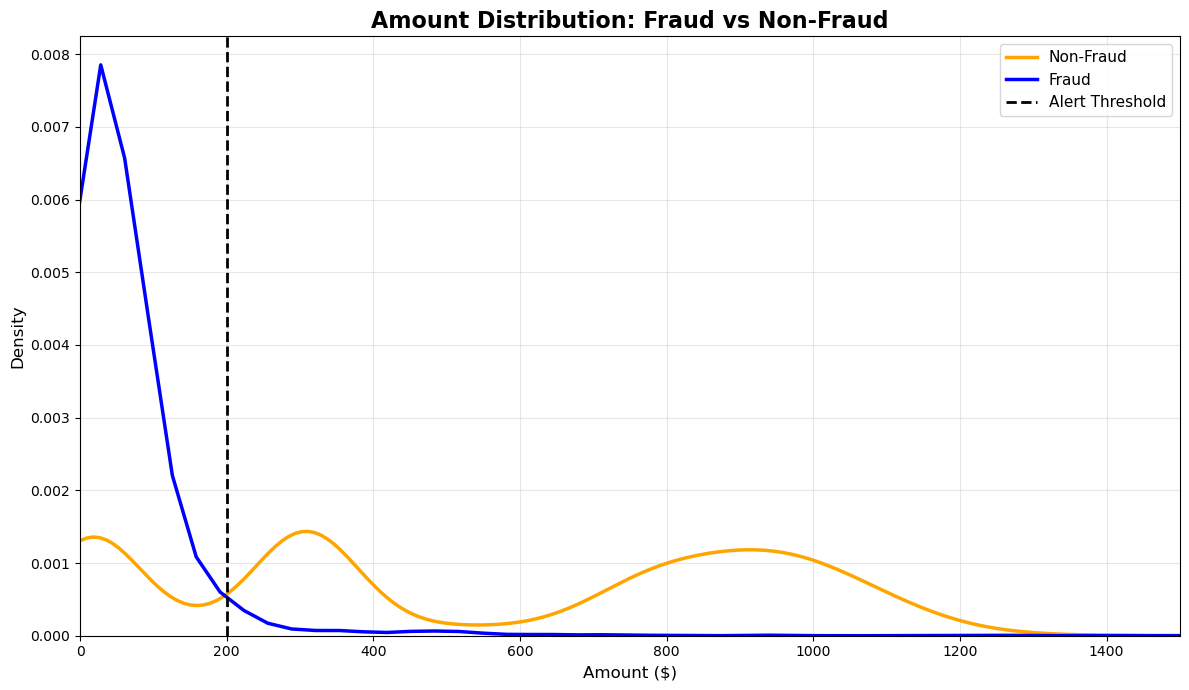

💾 KDE Plot displayed!


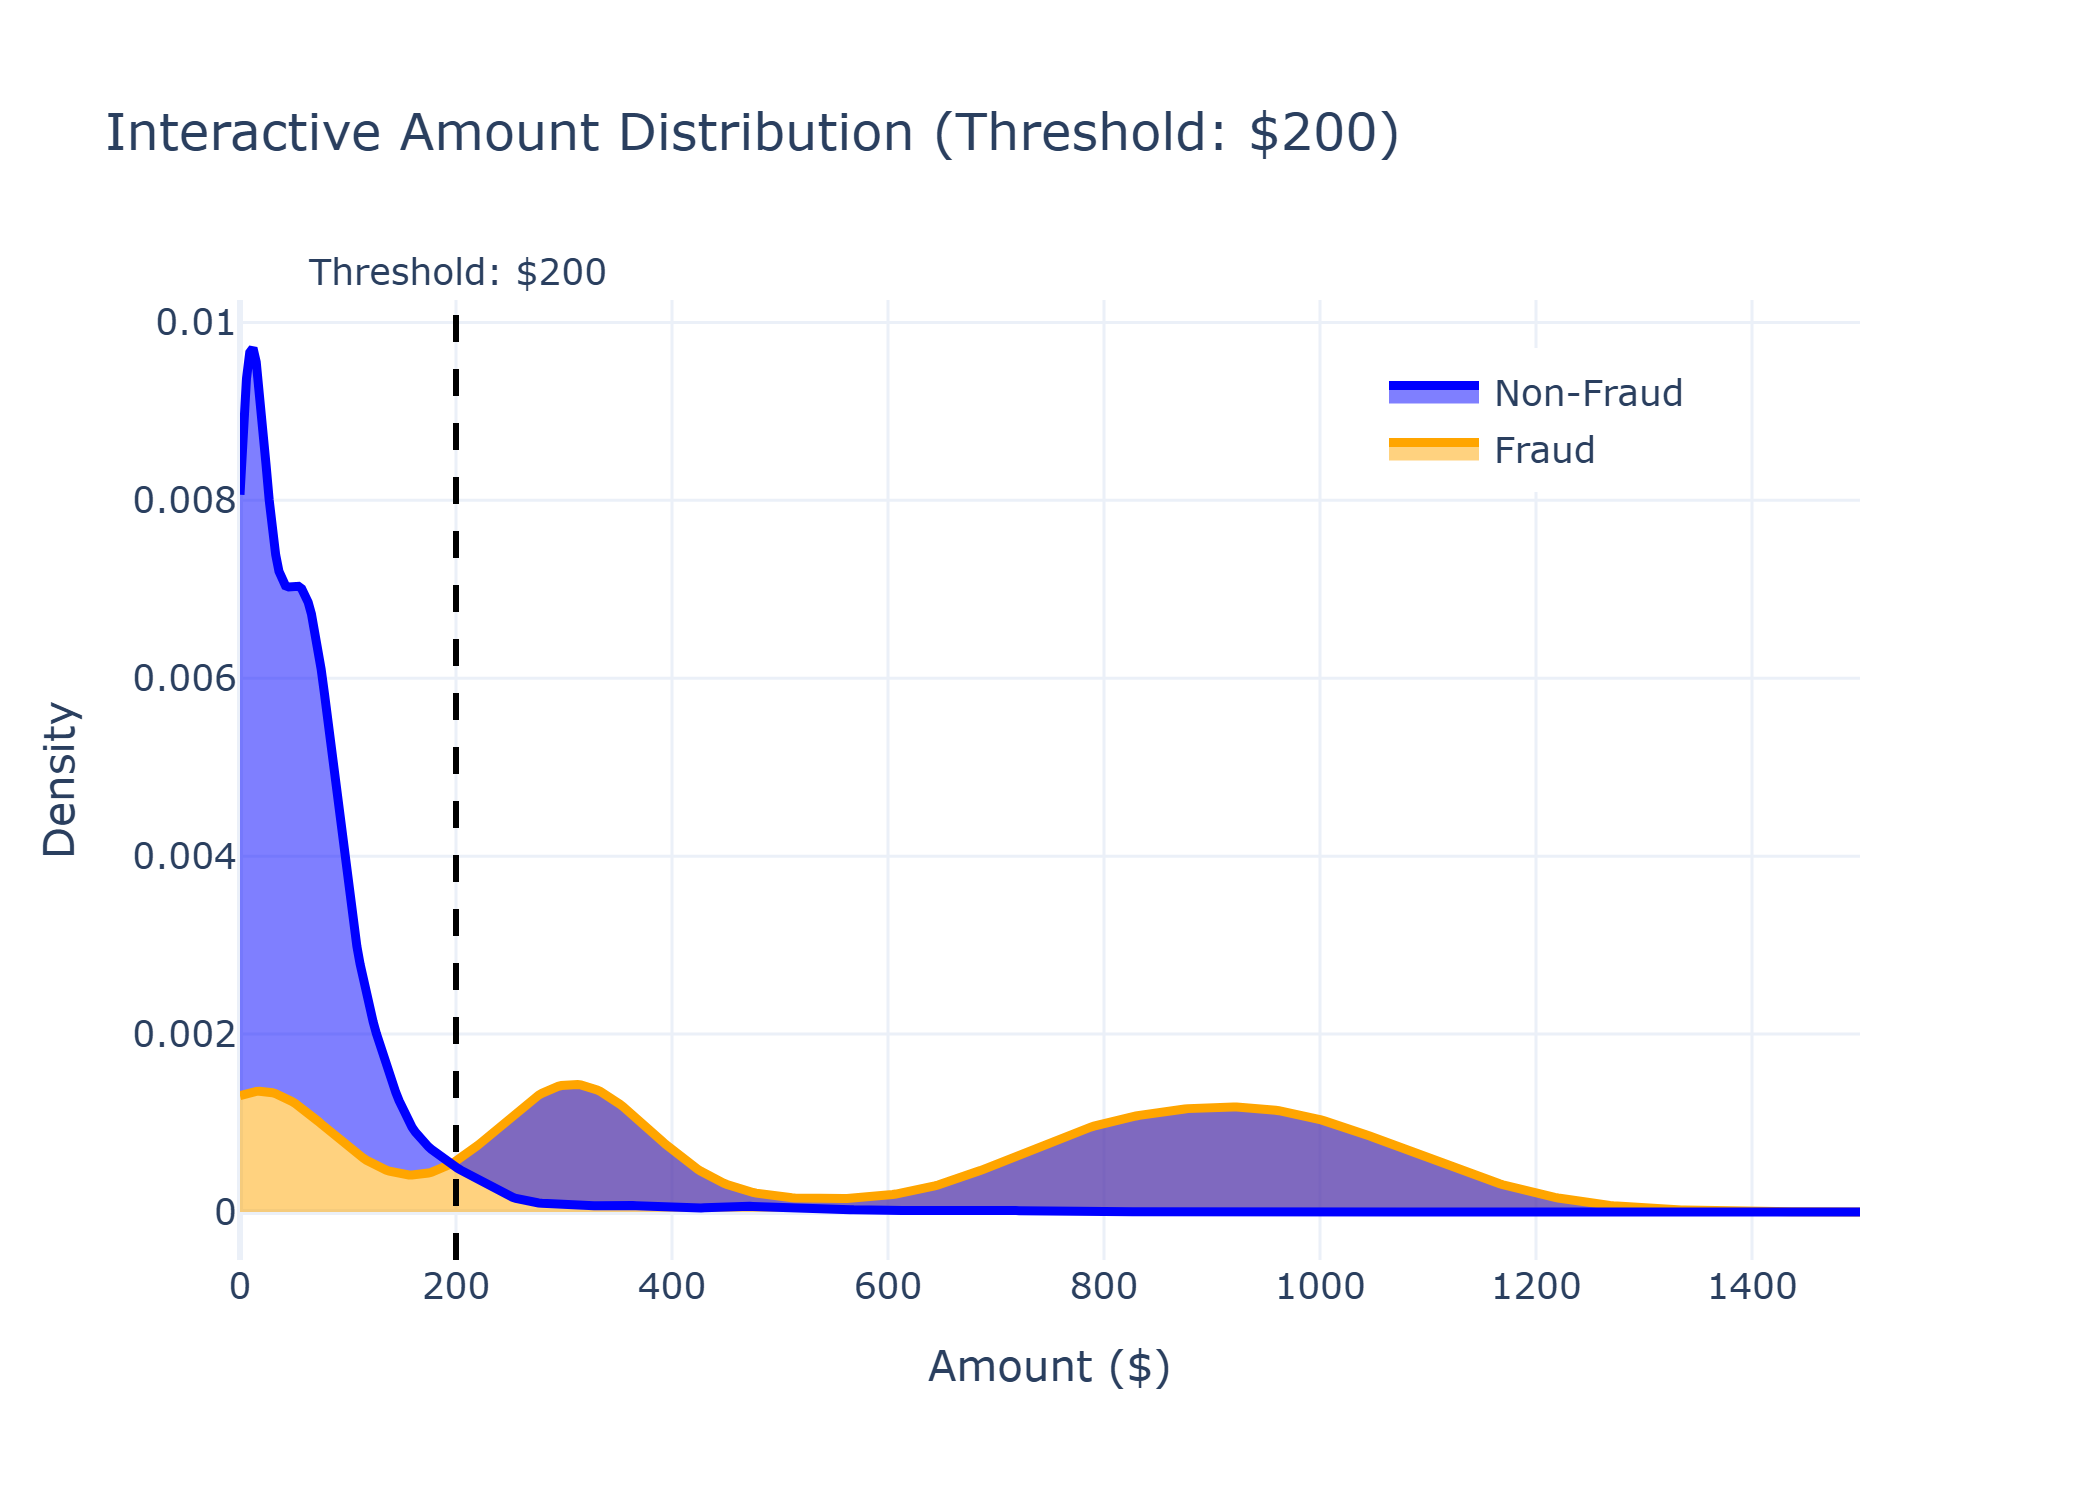

🎯 Interactive KDE plot saved as PNG!
1. Box Plot


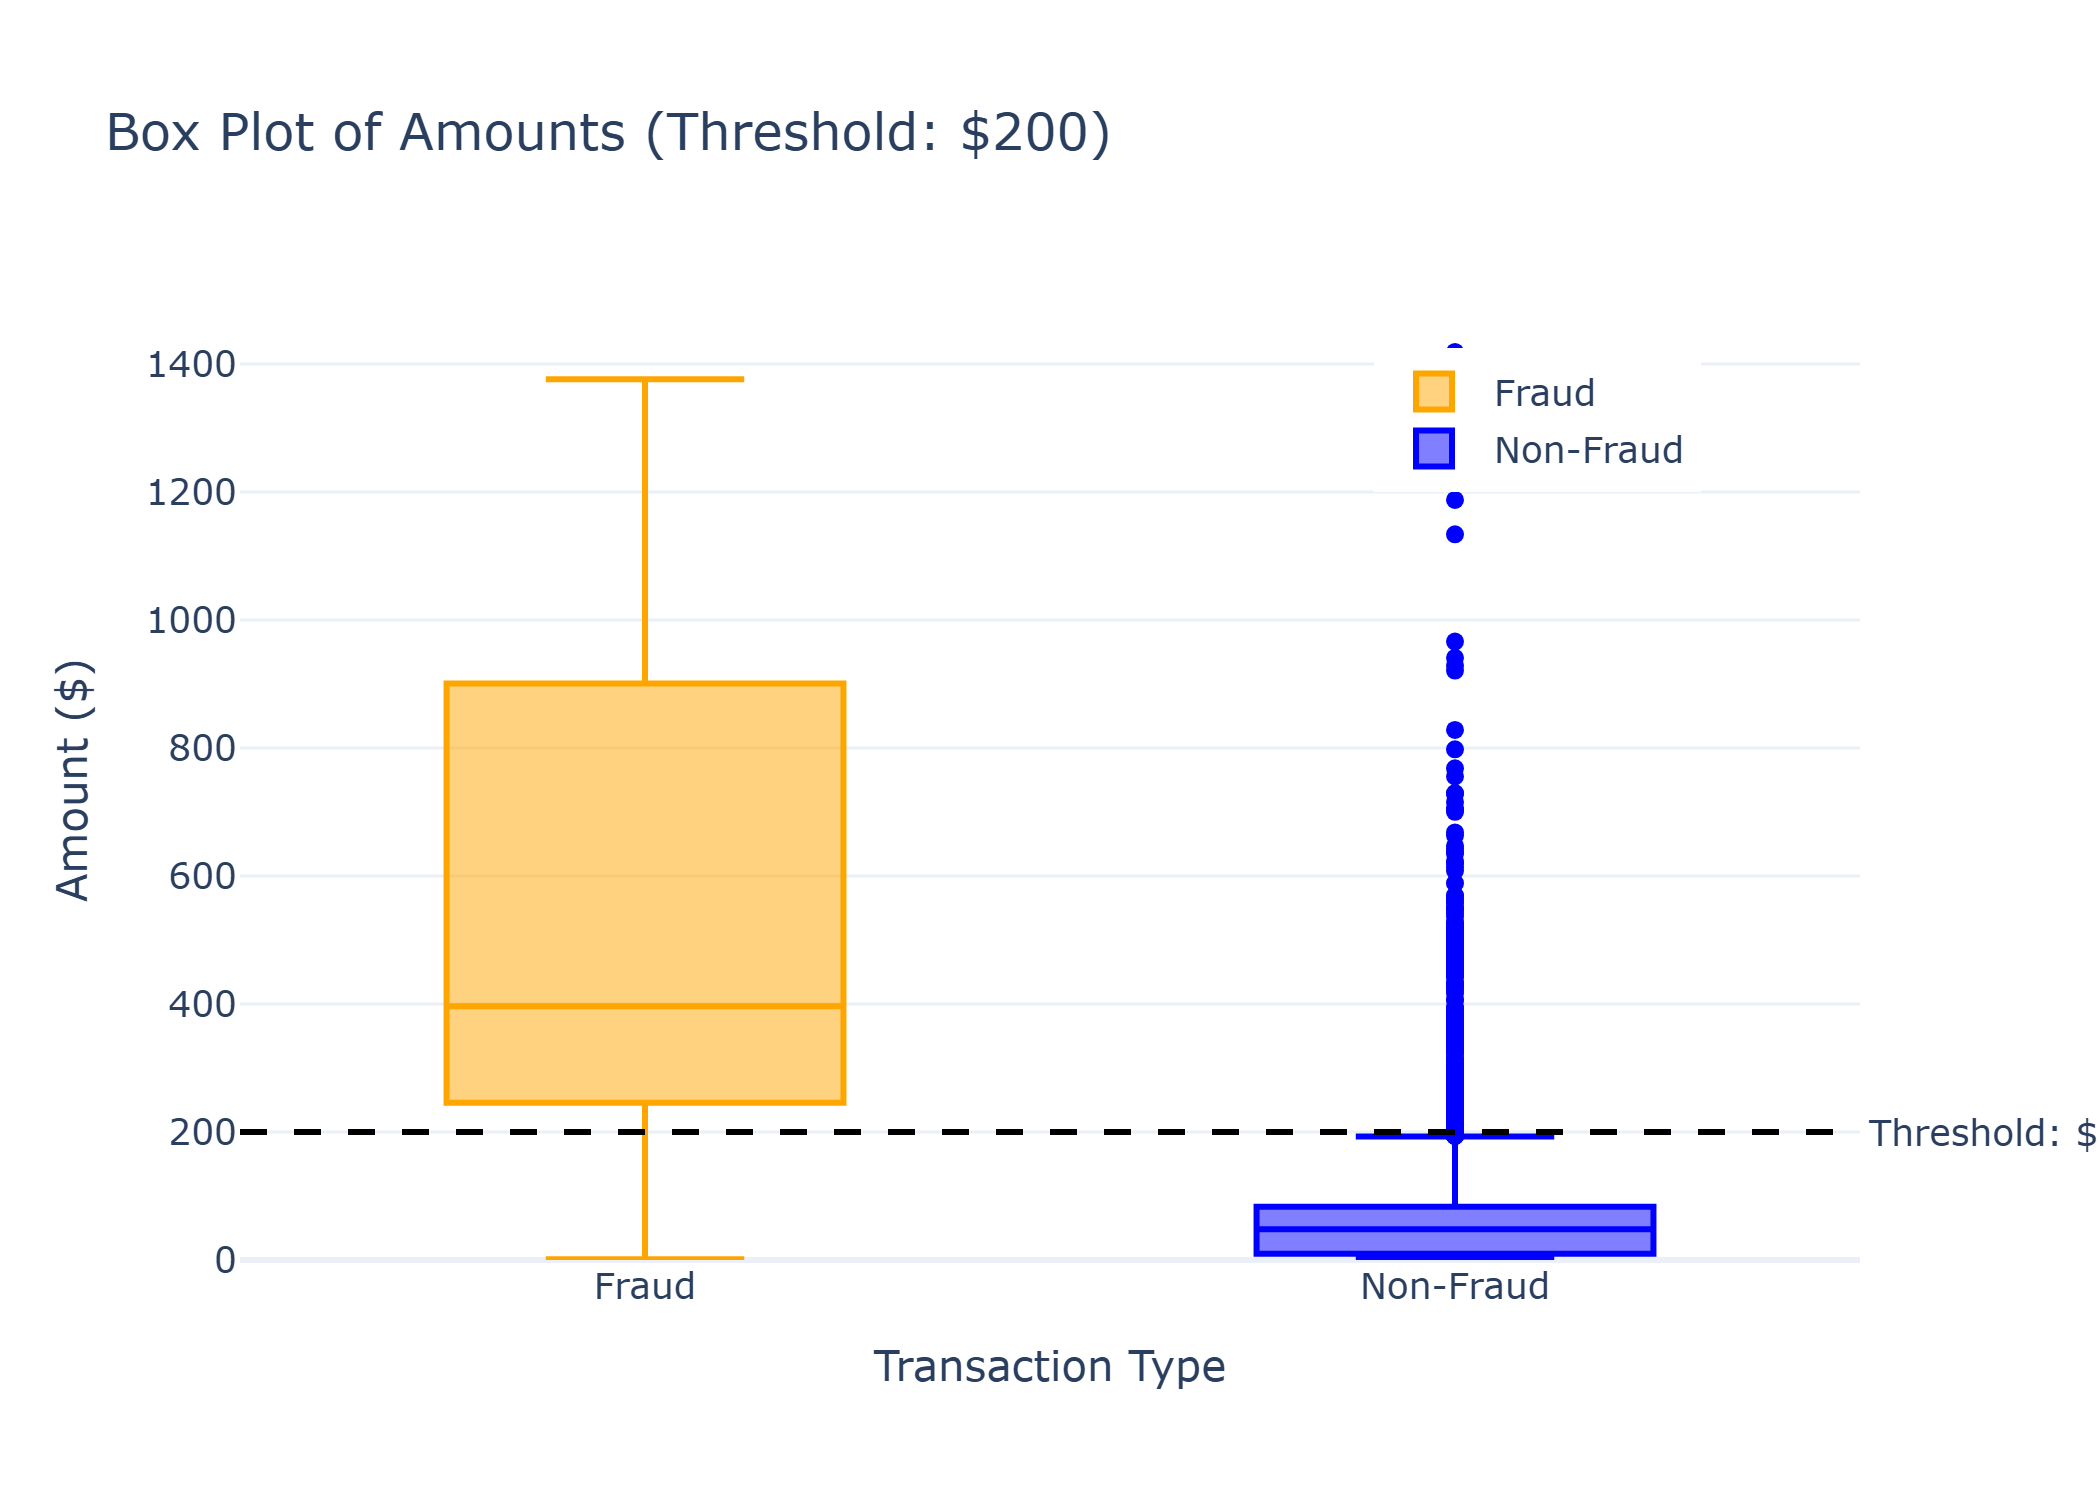

2. Histogram


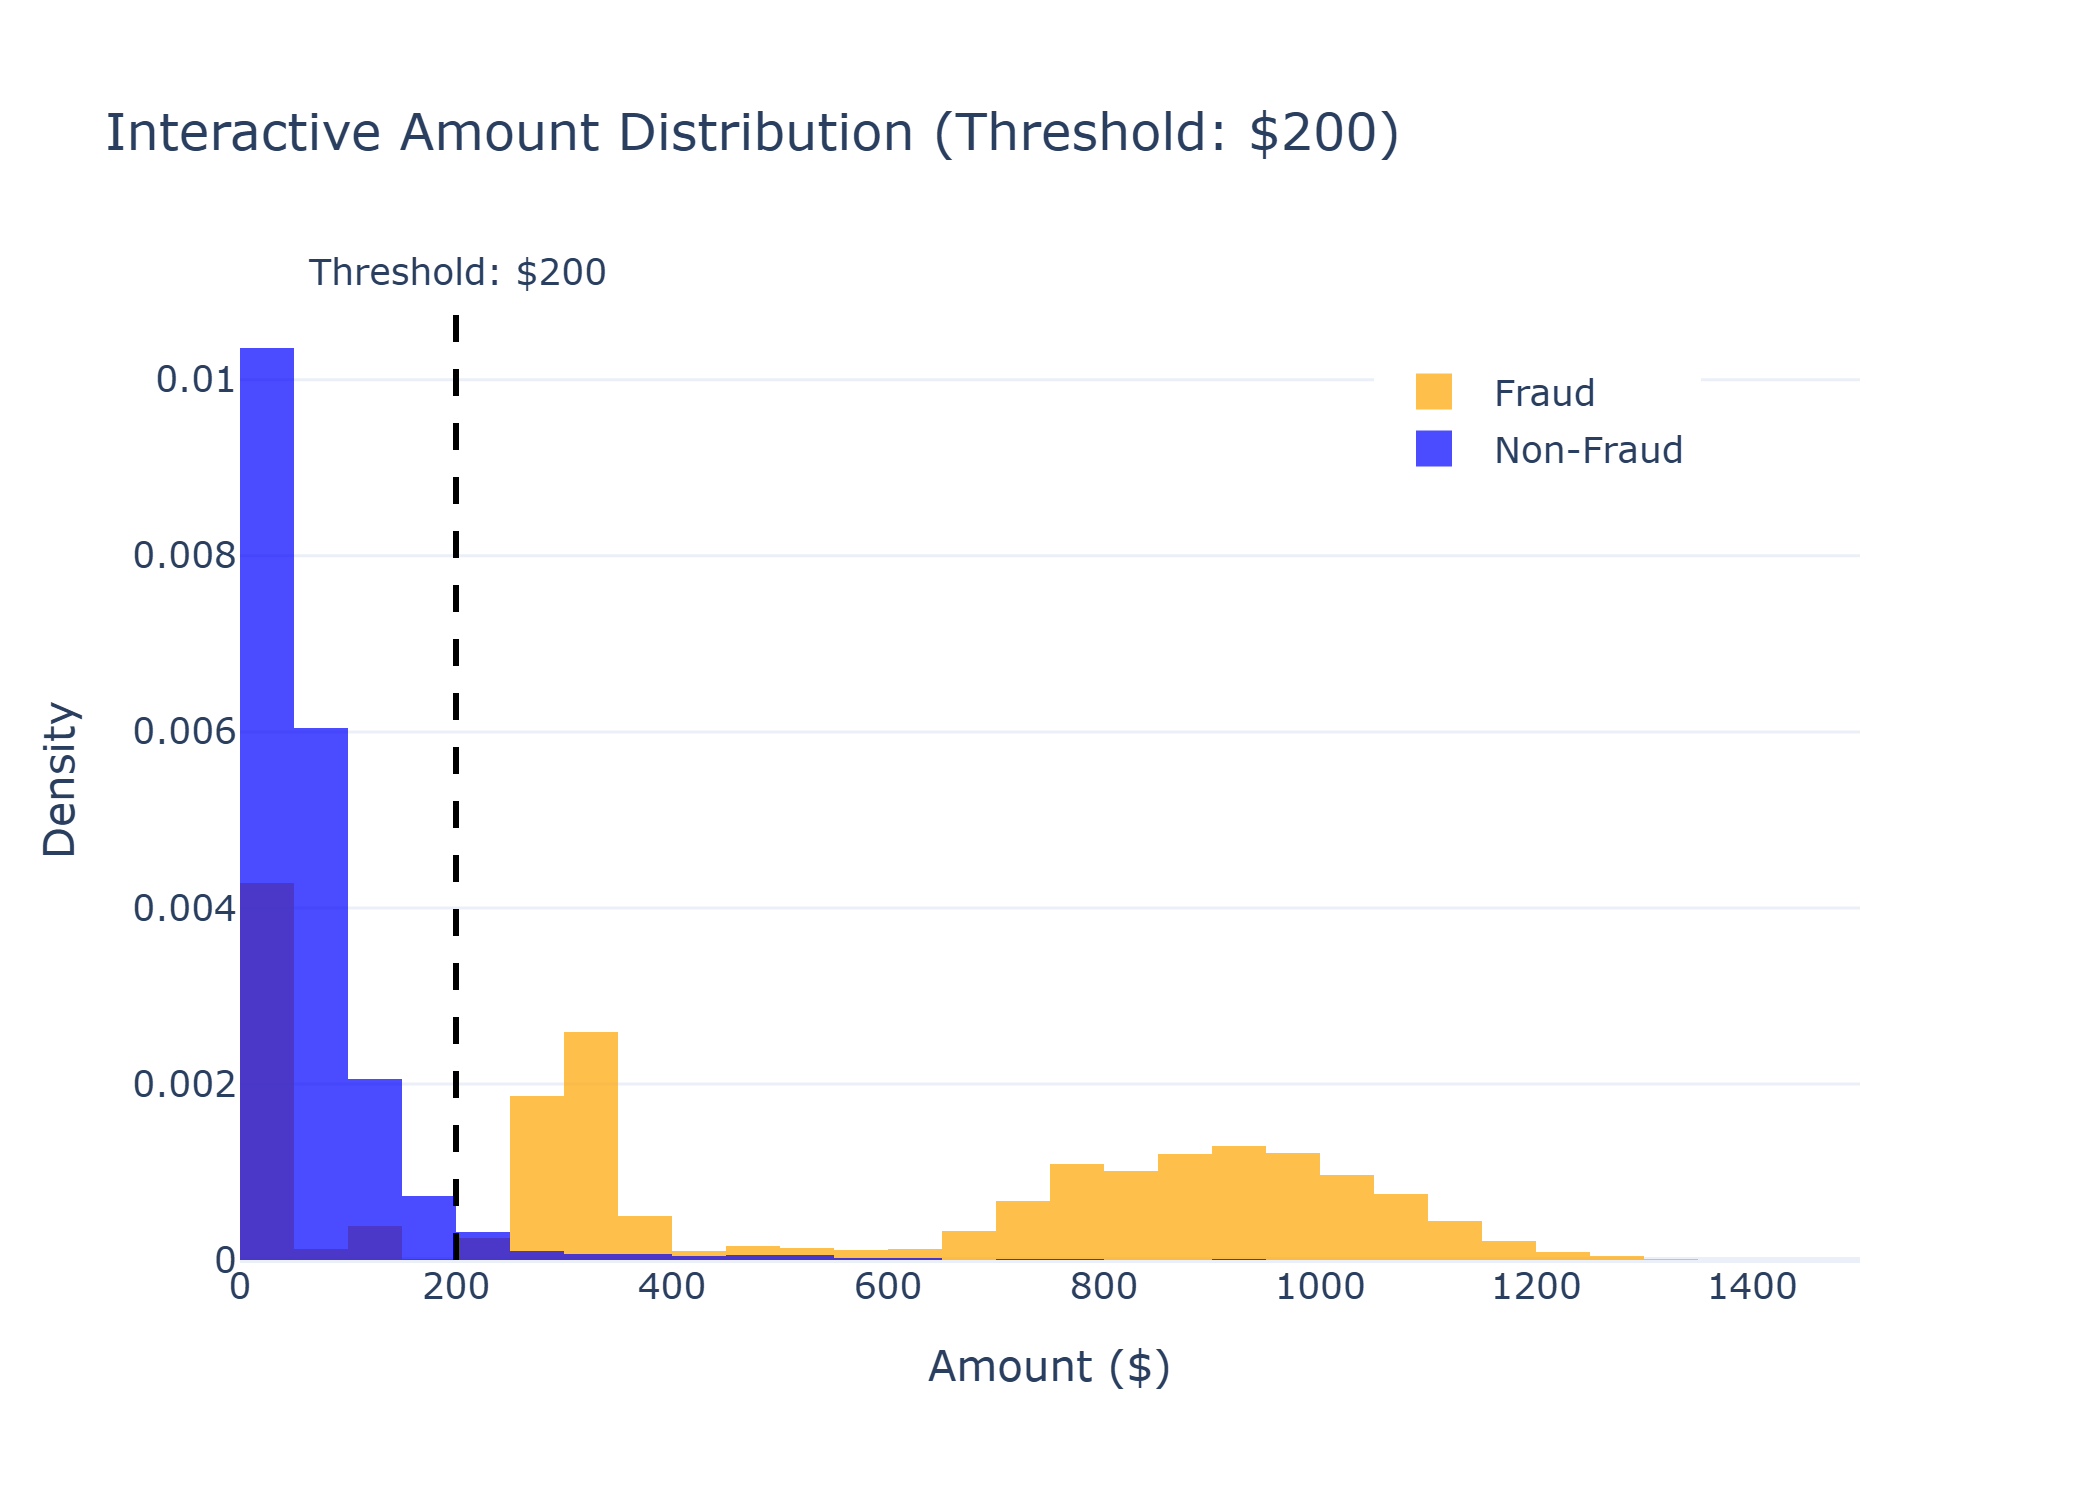

✅ All plots have been generated!

🎯 THRESHOLD PERFORMANCE ANALYSIS
   threshold  frauds_detected  false_positives  total_alerts  precision  \
0        100             5854             1356          7210      81.19   
1        150             5709              587          6296      90.68   
2        200             5704              314          6018      94.78   
3        250             5610              194          5804      96.66   
4        300             4908              156          5064      96.92   
5        400             3749              106          3855      97.25   
6        500             3648               68          3716      98.17   

   recall  f1_score  
0   77.99     79.56  
1   76.06     82.73  
2   75.99     84.35  
3   74.74     84.30  
4   65.39     78.09  
5   49.95     66.00  
6   48.60     65.02  


WARNING	Thread(Thread-110) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


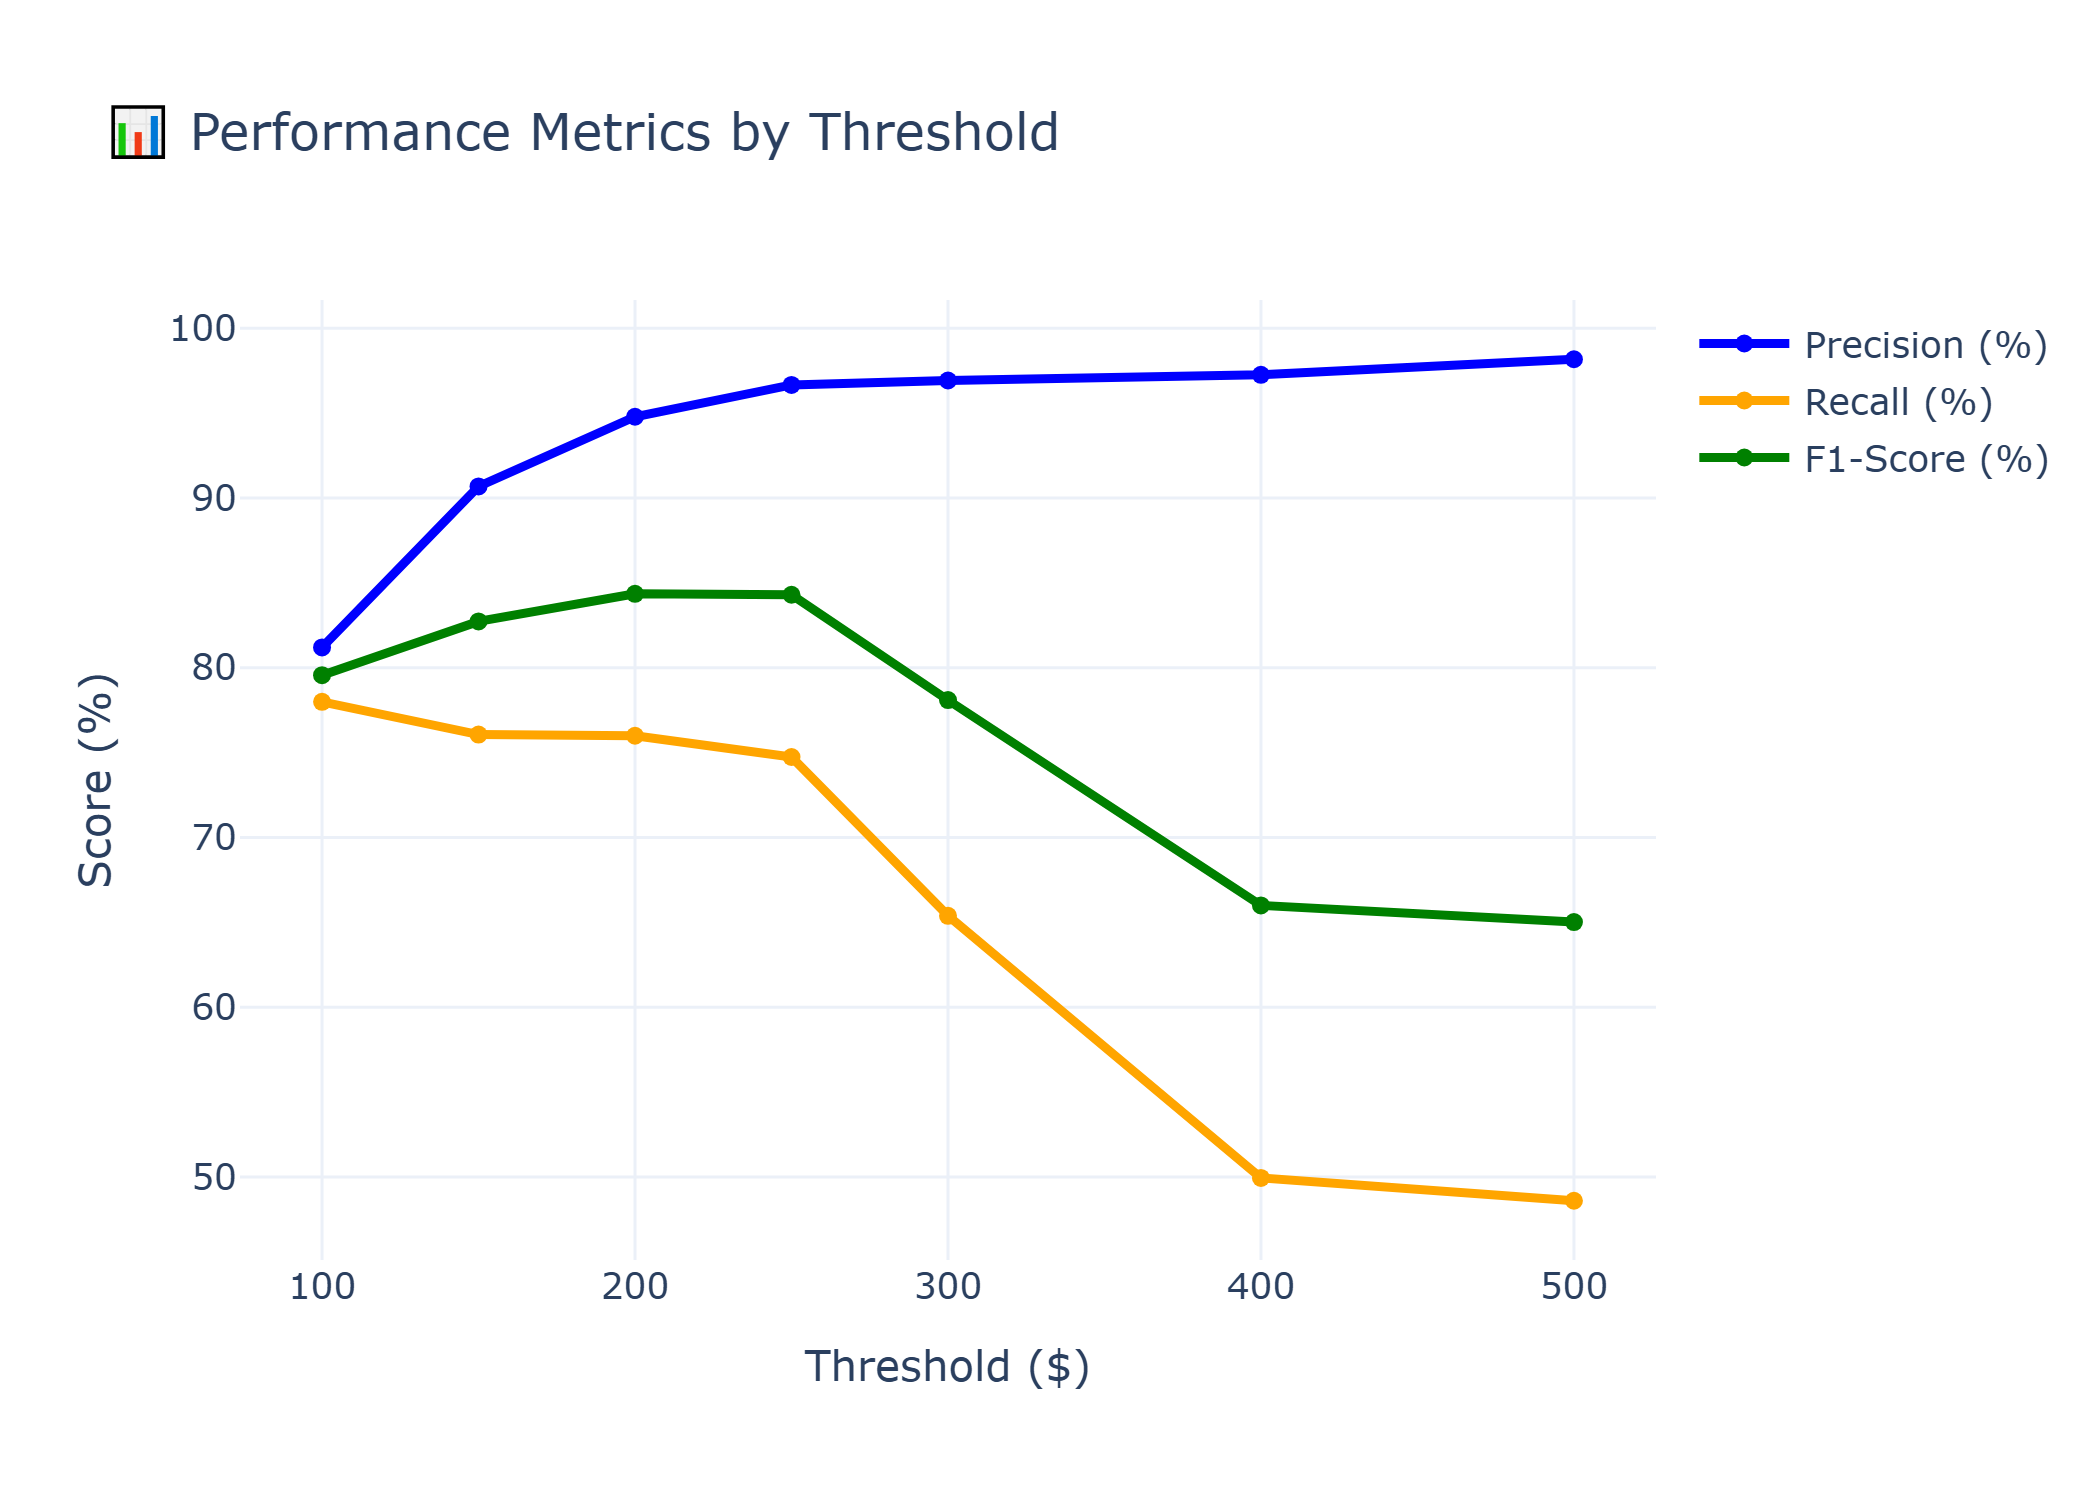


🏆 OPTIMAL THRESHOLD: $200.0 (F1-Score: 84.35%)


In [63]:
plt.style.use('default')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")

# Load data
df = pd.read_csv('eda_fraud_balanced_sorted.csv')
print("✅ Real data loaded!")

print(f"📈 Dataset loaded: {len(df):,} transactions")
print(f"🚨 Fraudulent transactions: {df['is_fraud'].sum():,} ({df['is_fraud'].mean()*100:.1f}%)")
print(f"✅ Legitimate transactions: {(df['is_fraud']==0).sum():,} ({(1-df['is_fraud'].mean())*100:.1f}%)")

print("\n📋 Data preview:")
print(df.head())

print("\n📊 DESCRIPTIVE STATISTICS")
print("="*50)

fraud_stats = df[df['is_fraud'] == 1]['amt']
non_fraud_stats = df[df['is_fraud'] == 0]['amt']

print(f"\n🚨 FRAUDULENT TRANSACTIONS:")
print(f"   Count: {len(fraud_stats):,}")
print(f"   Mean: ${fraud_stats.mean():.2f}")
print(f"   Median: ${fraud_stats.median():.2f}")
print(f"   Std Dev: ${fraud_stats.std():.2f}")
print(f"   Min: ${fraud_stats.min():.2f}")
print(f"   Max: ${fraud_stats.max():.2f}")

print(f"\n✅ LEGITIMATE TRANSACTIONS:")
print(f"   Count: {len(non_fraud_stats):,}")
print(f"   Mean: ${non_fraud_stats.mean():.2f}")
print(f"   Median: ${non_fraud_stats.median():.2f}")
print(f"   Std Dev: ${non_fraud_stats.std():.2f}")
print(f"   Min: ${non_fraud_stats.min():.2f}")
print(f"   Max: ${non_fraud_stats.max():.2f}")

plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='amt', hue='is_fraud', common_norm=False, 
            palette={0: 'blue', 1: 'orange'}, linewidth=2.5)
plt.axvline(200, color='black', linestyle='--', linewidth=2, label='Alert Threshold ($200)')
plt.xlim(0, 1500)
plt.title('Amount Distribution: Fraud vs Non-Fraud', fontsize=16, fontweight='bold')
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(['Non-Fraud', 'Fraud', 'Alert Threshold'], fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💾 KDE Plot displayed!")

def create_interactive_plot(threshold=200, xlim=1500, plot_type='kde'):
    """Create an interactive plot using Plotly"""
    
    df_filtered = df[df['amt'] <= xlim].copy()
    
    fig = go.Figure()
    
    if plot_type == 'kde':
        fraud_data = df_filtered[df_filtered['is_fraud'] == 1]['amt']
        non_fraud_data = df_filtered[df_filtered['is_fraud'] == 0]['amt']
        
        if len(fraud_data) > 1:
            kde_fraud = stats.gaussian_kde(fraud_data)
            x_range = np.linspace(0, xlim, 500)
            fraud_density = kde_fraud(x_range)
            
            fig.add_trace(go.Scatter(
                x=x_range, y=fraud_density,
                mode='lines', name='Fraud',
                line=dict(color='orange', width=3),
                fill='tonexty'
            ))
        
        if len(non_fraud_data) > 1:
            kde_non_fraud = stats.gaussian_kde(non_fraud_data)
            non_fraud_density = kde_non_fraud(x_range)
            
            fig.add_trace(go.Scatter(
                x=x_range, y=non_fraud_density,
                mode='lines', name='Non-Fraud',
                line=dict(color='blue', width=3),
                fill='tonexty'
            ))
    
    elif plot_type == 'hist':
        fig.add_trace(go.Histogram(
            x=df_filtered[df_filtered['is_fraud'] == 1]['amt'],
            name='Fraud', opacity=0.7, nbinsx=50,
            marker_color='orange', histnorm='probability density'
        ))
        
        fig.add_trace(go.Histogram(
            x=df_filtered[df_filtered['is_fraud'] == 0]['amt'],
            name='Non-Fraud', opacity=0.7, nbinsx=50,
            marker_color='blue', histnorm='probability density'
        ))
        fig.update_layout(barmode='overlay')
    
    elif plot_type == 'box':
        
        fig.add_trace(go.Box(
            y=df_filtered[df_filtered['is_fraud'] == 1]['amt'],
            name='Fraud',
            marker_color='orange',
            boxpoints='outliers'
        ))
        
        fig.add_trace(go.Box(
            y=df_filtered[df_filtered['is_fraud'] == 0]['amt'],
            name='Non-Fraud',
            marker_color='blue',
            boxpoints='outliers'
        ))
        
    if plot_type != 'box':
        fig.add_vline(
            x=threshold, line_dash="dash", line_color="black", line_width=2,
            annotation_text=f"Threshold: ${threshold:,}",
            annotation_position="top"
        )
    else:
        fig.add_hline(
            y=threshold, line_dash="dash", line_color="black", line_width=2,
            annotation_text=f"Threshold: ${threshold:,}",
            annotation_position="right"
        )
    
    if plot_type == 'box':
        fig.update_layout(
            title=f'Box Plot of Amounts (Threshold: ${threshold:,})',
            xaxis_title='Transaction Type',
            yaxis_title='Amount ($)',
            yaxis=dict(range=[0, xlim]),
            template='plotly_white',
            legend=dict(x=0.7, y=0.95),
            width=1200,
            height=800
        )
    else:
        fig.update_layout(
            title=f'Interactive Amount Distribution (Threshold: ${threshold:,})',
            xaxis_title='Amount ($)',
            yaxis_title='Density',
            xaxis=dict(range=[0, xlim]),
            template='plotly_white',
            hovermode='x unified',
            legend=dict(x=0.7, y=0.95),
            width=1200,
            height=800
        )
    
    return fig

import plotly.io as pio
pio.renderers.default = 'png'

fig_interactive = create_interactive_plot()
fig_interactive.update_layout(width=1200, height=800)
fig_interactive.write_image("plot_visible_on_github.png", scale=3)
display(Image("plot_visible_on_github.png"))
print("🎯 Interactive KDE plot saved as PNG!")

print("1. Box Plot")
fig_box = create_interactive_plot(threshold=200, plot_type='box')
fig_box.update_layout(width=1200, height=800)
fig_box.write_image("box_plot.png", scale=3)
display(Image("box_plot.png"))

print("2. Histogram")
fig_hist = create_interactive_plot(threshold=200, plot_type='hist')
fig_hist.update_layout(width=1200, height=800)
fig_hist.write_image("histogram_plot.png", scale=3)
display(Image("histogram_plot.png"))

print("✅ All plots have been generated!")

def analyze_threshold(threshold):
    """Analyze performance for a given threshold"""
    fraud_above = len(df[(df['is_fraud'] == 1) & (df['amt'] > threshold)])
    non_fraud_above = len(df[(df['is_fraud'] == 0) & (df['amt'] > threshold)])
    total_fraud = len(df[df['is_fraud'] == 1])
    total_above = fraud_above + non_fraud_above
    
    precision = (fraud_above / total_above * 100) if total_above > 0 else 0
    recall = (fraud_above / total_fraud * 100) if total_fraud > 0 else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
    
    return {
        'threshold': threshold,
        'frauds_detected': fraud_above,
        'false_positives': non_fraud_above,
        'total_alerts': total_above,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

thresholds_test = [100, 150, 200, 250, 300, 400, 500]
results = [analyze_threshold(s) for s in thresholds_test]

df_results = pd.DataFrame(results)

print("\n🎯 THRESHOLD PERFORMANCE ANALYSIS")
print("="*60)
print(df_results.round(2))

fig_metrics = go.Figure()

fig_metrics.add_trace(go.Scatter(
    x=df_results['threshold'], y=df_results['precision'],
    mode='lines+markers', name='Precision (%)',
    line=dict(color='blue', width=3)
))

fig_metrics.add_trace(go.Scatter(
    x=df_results['threshold'], y=df_results['recall'],
    mode='lines+markers', name='Recall (%)',
    line=dict(color='orange', width=3)
))

fig_metrics.add_trace(go.Scatter(
    x=df_results['threshold'], y=df_results['f1_score'],
    mode='lines+markers', name='F1-Score (%)',
    line=dict(color='green', width=3)
))

fig_metrics.update_layout(
    title='📊 Performance Metrics by Threshold',
    xaxis_title='Threshold ($)',
    yaxis_title='Score (%)',
    template='plotly_white',
    hovermode='x unified',
    width=1200,
    height=800
)

fig_metrics.update_layout(width=1200, height=800)
fig_metrics.write_image("performance_metrics.png", scale=3)
display(Image("performance_metrics.png"))

if len(df_results) > 0 and df_results['f1_score'].max() > 0:
    optimal_threshold = df_results.loc[df_results['f1_score'].idxmax()]
    print(f"\n🏆 OPTIMAL THRESHOLD: ${optimal_threshold['threshold']} (F1-Score: {optimal_threshold['f1_score']:.2f}%)")
else:
    print("\n⚠️ No optimal threshold found in the tested range")

# 🕵️‍♂️ Fraud Detection Analysis – EDA Results

This fraud detection analysis reveals very interesting patterns! Below are the key findings:

## 📊 **Transaction Profiles**
| Characteristic       | Legitimate Transactions | Fraudulent Transactions |
|----------------------|--------------------------|--------------------------|
| **Mean Amount**      | $68                      | $531                |
| **Median Amount**    | $72                      | $396                 |
| **Max Amount**       | $6,337                   | $1,376               |

🔍 **Insight**:  
Fraudulent transactions have significantly higher average amounts compared to legitimate ones. The distribution is more concentrated around the mean and median in fraudulent cases.

## 🎯 **Threshold Optimization**

The **$200 threshold** stands out as optimal with the following performance:

- ✅ **Maximum F1-score**: 84.35%
- ✅ **High Precision**: 94.78% (few false positives)
- ✅ **Balanced Recall**: 75.99% (detects about 3/4 of fraud cases)
- ✅ **Operational Alert Volume**: 6,018 alerts

📊 This threshold offers the best balance between detecting fraud and minimizing unnecessary alerts.

## 📈 Observed Trade-offs

| Threshold Range ($)| Performance Characteristics                          |
|---------------------|-------------------------------------------------------|
| **Low (<150)**       | High recall but many false positives                  |
| **High (>400)**      | Very precise but misses many frauds                   |
| **Optimal (200–250)** | Best balance between precision and recall           |

🎯 **Conclusion**: The **$200–250 range** provides the most effective compromise for real-world deployment.

## 💡 Key Insights for ML Modeling

1. **Strong Predictive Feature**:  
   The significant difference in average transaction amounts (**$531 vs $68**) suggests that `amount` will be a powerful feature for classification models.

2. **Decision Boundary Guidance**:  
   Models should focus their decision boundary around the **$200–250** range based on threshold analysis.

3. **Baseline Rule-Based Performance**:  
   A simple rule using the $200 threshold already achieves an **F1-score of 84.35%**, setting a solid baseline for ML model comparison.

4. **Balanced Dataset**:  
   With equal samples of **7,506 fraudulent and legitimate transactions**, this dataset facilitates robust model training and evaluation without class imbalance issues.